<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/34_Lite_%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8_(%D0%A3%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B8%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Lite

Макс 10 баллов

Используйте готовый ноутбук с занятия:
1. Обучите автокодировщик на 10 выбранных вами красивых цифрах 5 и отредактируйте с помощью него все остальные цифры 5
2. Напишите 3 автокодировщика для подавления шума с собственными архитектурами. Сравните их между собой и с исходным шумоподавляющим атокодировщиком. Сравнивайте по квадрату разности исходной картинки с востановленной из шума
3. Обучите автокодировщик на базе Fashion Mnist, проверьте, как он преобразует картинки одежды, на которых не обучался

#Автокодировщики


In [ ]:
from tensorflow.keras.models import Model, Sequential # загружаем абстрактный класс базовой модели сети от кераса и последовательную модель
# Из кераса загружаем необходимые слои для нейросети
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dropout, UpSampling2D
from tensorflow.keras import backend as K # подтягиваем базовые керасовские функции
from tensorflow.keras.optimizers import Adam # загружаем выбранный оптимизатор
from tensorflow.keras import utils # загружаем утилиты кераса
from tensorflow.keras.datasets import mnist, fashion_mnist # загружаем готовые базы mnist
from tensorflow.keras.callbacks import LambdaCallback

import matplotlib.pyplot as plt # из библиотеки для визуализации данных возьмём интерфейс для построения графиков простых функций
from tensorflow.keras.preprocessing import image # модуль для отрисовки изображения
import numpy as np # библиотека для работы с массивами данных
import pandas as pd # библиотека для анализа и обработки данных
from PIL import Image # модуль для отрисовки изображения
from sklearn.model_selection import train_test_split # модуль для разбивки выборки на тренировочную/тестовую
from sklearn.preprocessing import StandardScaler # модуль для стандартизации данных

import os #
from google.colab import drive #модуль для работы с google диском 
import time, random
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
drive.mount('/content/drive/') # монтируем google диск

Mounted at /content/drive/


In [ ]:
def baseAutoencoder_10(shape=(112,80,1)): # зададим функцию создания базового автокодировщика
    img_input = Input((shape)) # задаём входные размеры

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) # входные данные передаем на слой двумерной свёртки
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)  # далее снова слой двумерной свёртки   
    x = BatchNormalization()(x)

    z = MaxPooling2D()(x) # передаём на слой подвыборки    
   
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z) # слой разжимает данные(с 28*20 на 56*40)   
    x = BatchNormalization()(x) 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x)    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
    
    # Финальный слой двумерной свертки, выдающий итоговое изображение
    x = Conv2D(shape[-1], (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x) # указываем модель, с оригинальным изображением на входе в сеть и сжатым-разжатым на выходе из сети
    model.compile(optimizer=Adam(lr=0.0001),
                  loss='mean_squared_error') # компилируем модель с оптимайзером Адам и среднеквадратичной ошибкой

    return model # функция вернёт заданную модель

In [ ]:
def plotImages(xTrain, pred, shape=(112, 80)): # создадим функцию для вывода изображений как картинок
  n = 5  # количество картинок, которые хотим показать
  plt.figure(figsize=(14, 7)) # указываем размеры фигуры
  for i in range(n): # для каждой картинки из n(5)
      index = np.random.randint(0, pred.shape[0]) # startIndex - начиная с какого индекса хотим заплотить картинки
      # Показываем картинки из тестового набора
      ax = plt.subplot(2, n, i + 1) # выведем область рисования Axes
      plt.imshow(new_x_test_left[index].reshape(shape)) # отрисуем правильные картинки в размере 112*80      
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y

      # Показываем восстановленные картинки
      ax = plt.subplot(2, n, i + 1 + n) # выведем область рисования Axes 
      plt.imshow(pred[index].reshape(shape)) # отрисуем обработанные сеткой картинки в размере 112*80     
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y
  plt.show()

In [ ]:
# Функция для расчета mse
def getMSE(x1, x2): # создадим функцию среднеквадратичной ошибки
  x1 = x1.flatten() # сплющиваем в одномерный вектор
  x2 = x2.flatten() # сплющиваем в одномерный вектор
  delta = x1 - x2 # находим разницу
  return sum(delta ** 2) / len(delta) # и возвращаем сумму квадратов разницы, делённую на длину разницы

In [ ]:
# Зададим пару массивов и проверим работу функции
x1 = np.array([1, 1, 1]) # создаем первый массив
x2 = np.array([1, 1, 1]) # создаем второй массив
print(getMSE(x1,x2)) # выведем ошибку полученную нашей функцией

0.0


In [ ]:
# Зададим пару массивов и проверим работу функции
x1 = np.array([1, 1, 1, 1]) # создаем первый массив
x2 = np.array([1, 1, 0, 0]) # создаем второй массив
print(getMSE(x1,x2)) # выведем ошибку полученную нашей функцией

0.5


## 1.MINIST



In [ ]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data() # загружаем данные из базы с разбивкой на train/test
xTrainMnist = xTrainMnist.astype('float32')/255 # представляем в виде значений от 0 до 1
xTrainMnist = xTrainMnist.reshape(-1, 28, 28, 1) # меняем форму, приводим к нужным нам размерам
xTestMnist = xTestMnist.astype('float32')/255 # представляем в виде значений от 0 до 1
xTestMnist = xTestMnist.reshape(-1, 28, 28, 1) # меняем форму, приводим к нужным нам размерам

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(xTrainMnist.shape) # Отобразим размерность массива xTrainMnist
print(yTrainMnist.shape)

(60000, 28, 28, 1)
(60000,)


In [ ]:
# Выбор красивых картинок путем просмотра по номеру элемента в массиве данных, где хранятся только 5-рки
numbers = [5] # Задаем цифры для визуализации
mask = np.array([(i in numbers) for i in yTrainMnist]) # Создаем маску по выбранным цифрам
new_x_train = xTrainMnist[mask] # Выбираем из xTrain только картики по маске
new_y_train = yTrainMnist[mask] # Выбираем из yTrain только метки по маске


print(new_x_train.shape)
print(new_y_train.shape)

(5421, 28, 28, 1)
(5421,)


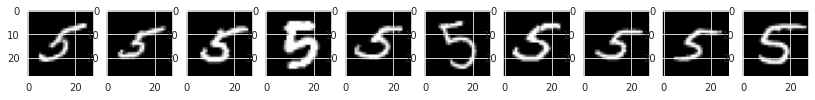

In [ ]:
# Выбор красивых картинок 
num = 10
n_rec = [2,9,10,16,22,24,30,32,35,36] #Номер тестовой цифры, которую будем распознавать
plt.figure(figsize=(14, 7)) # указываем размеры фигуры

for i in range(num): # для каждой картинки из num
   index = n_rec[i]  # берем значение из списка = номеру элемента красивой картинки
   ax = plt.subplot(1,num, i+1) # выводим область рисования
   plt.imshow(new_x_train[index].reshape(28,28)) #отрисуем картинки 
   plt.gray() # выведем в черно-белом цвете
plt.show()

In [ ]:
# Cоздаем набор данных для обучения на 10 красивых картинках
new_x_train_10 = new_x_train[n_rec] # Выбираем из new_x_train 
new_y_train_10 = new_y_train[n_rec] # Выбираем из new_y_train 
print(new_x_train_10.shape) 
print(new_y_train_10.shape)
#Создадим выборку, состояющую только из красивых 5-ок, длиной new_x_train
xEtalonTrain = []
for idx, i in enumerate(new_x_train):
    xEtalonTrain.append(new_x_train_10[idx%10])

xEtalonTrain = np.array(xEtalonTrain)
print(xEtalonTrain.shape)


(10, 28, 28, 1)
(10,)
(5421, 28, 28, 1)


In [ ]:
# # Cоздаем набор данных для тестирования автокодировкщика, обученного на 10 красивых картинках
# new_x_train_left = np.delete(new_x_train, n_rec, axis=0)
# new_y_train__left = np.delete(new_y_train, n_rec, axis=0)
# print(new_x_test_left.shape)
# print(new_y_test__left.shape)

(5411, 28, 28, 1)
(5411,)


In [ ]:
modelAutoMnist_10= baseAutoencoder_10((28,28,1)) # создаем автокодировщик

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

modelAutoMnist_10.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_19 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0   

In [ ]:
# Обучаем модель автокодировщика
history = modelAutoMnist_10.fit(new_x_train[:5000],
                                xEtalonTrain[:5000],
                                epochs=20, 
                                batch_size=1, 
                                validation_data = (new_x_train[:5000], xEtalonTrain[:5000]))

Epoch 1/20
5000/5000 [==============================] - 33s 6ms/step - loss: 0.0590 - val_loss: 0.0575
Epoch 2/20
5000/5000 [==============================] - 32s 6ms/step - loss: 0.0558 - val_loss: 0.0575
Epoch 3/20
5000/5000 [==============================] - 32s 6ms/step - loss: 0.0550 - val_loss: 0.0557
Epoch 4/20
5000/5000 [==============================] - 31s 6ms/step - loss: 0.0545 - val_loss: 0.0554
Epoch 5/20
5000/5000 [==============================] - 31s 6ms/step - loss: 0.0542 - val_loss: 0.0557
Epoch 6/20
5000/5000 [==============================] - 31s 6ms/step - loss: 0.0539 - val_loss: 0.0550
Epoch 7/20
5000/5000 [==============================] - 31s 6ms/step - loss: 0.0536 - val_loss: 0.0550
Epoch 8/20
5000/5000 [==============================] - 32s 6ms/step - loss: 0.0533 - val_loss: 0.0551
Epoch 9/20
5000/5000 [==============================] - 31s 6ms/step - loss: 0.0531 - val_loss: 0.0548
Epoch 10/20
5000/5000 [==============================] - 32s 6ms/step - l

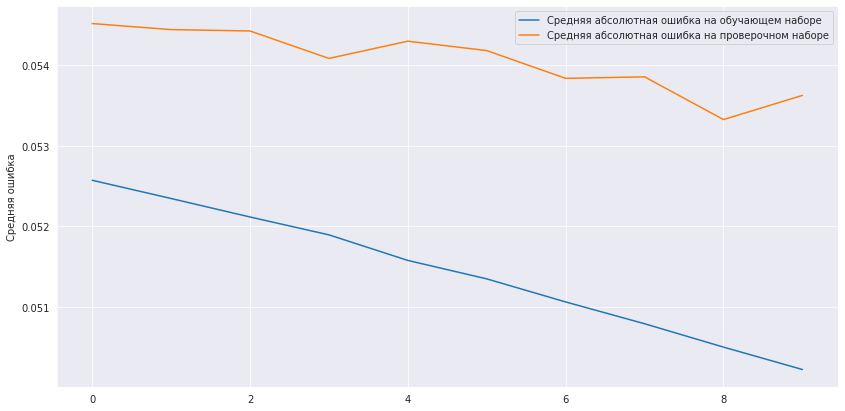

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][10:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][10:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
modelAutoMnist_10.save_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelAutoMnist.h5') # Сохраняем модель
modelAutoMnist_10.load_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelAutoMnist.h5') # Загружаем модель

In [ ]:
predMnistTest_10 = modelAutoMnist_10.predict(xEtalonTrain[:5000]) # Получаем результат работы модели на тестовой выборке
predMnistTest_10 = predMnistTest_10 * 255 # представляем в виде значений от 0 до 255
predMnistTest_10 = predMnistTest_10.astype('uint8') # устанавливаем 8битовый тип

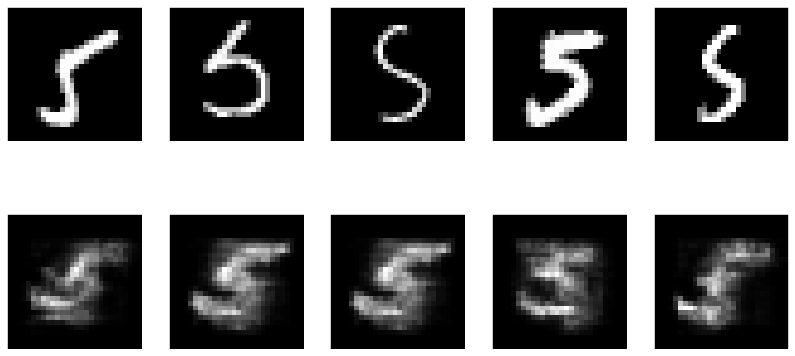

In [ ]:
plotImages(xEtalonTrain[:5000], predMnistTest_10, shape=(28,28)) # покажем исходные и восстановленные картинки

In [ ]:
predMnistTrain_10 = modelAutoMnist_10.predict(new_x_train[:5000]) # Получаем результат работы модели на обучающей выборке
predMnistTrain_10 = predMnistTrain_10 * 255 # представляем в виде значений от 0 до 255
predMnistTrain_10 = predMnistTrain_10.astype('uint8') # устанавливаем 8битовый тип

In [ ]:
err1 = [getMSE(new_x_train[i], predMnistTrain_10[i] / 255) for i in range(len(predMnistTrain_10))]# Возьмем среднеквадратичную ошибку от правильной картинки и восстановленной (обучающая выборка)
err2 = [getMSE(xEtalonTrain[i], predMnistTest_10[i] / 255) for i in range(len(predMnistTest_10))]# Возьмем среднеквадратичную ошибку от правильной картинки и восстановленной (тестовая выборка)
print("Средняя ошибка на обучающем наборе MNIST:", sum(err1) / new_x_train.shape[0]) # Отобразим ошибку на обучающей выборке
print("Средняя ошибка на тестовом наборе MNIST:", sum(err2) /xEtalonTrain.shape[0] ) # Отобразим ошибку на тестовой выборке

Средняя ошибка на обучающем наборе MNIST: 0.0605131596136984
Средняя ошибка на тестовом наборе MNIST: 0.046418134203155915


## 2.Fashion_mnist



In [ ]:
# Загрузим данные из fashion_mnist - базы с одеждой,обувью и т.п
(xTrainMnistF, yTrainMnistF), (xTestMnistF, yTestMnistF) = fashion_mnist.load_data()

xTrainMnistF = xTrainMnistF.reshape(xTrainMnistF.shape[0], 28, 28, 1) # меняем форму, приводим к нужным нам размерам

Класс изображения:  8


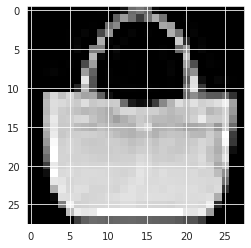

In [ ]:
# Взглянем на пример изображения из базы fashion_mnist
n = 100 # выбираем картинку
xxT = xTrainMnistF[n].reshape((28,28)) # указываем размеры этой картинки как 28*28

print('Класс изображения: ', yTrainMnistF[n])

img = Image.fromarray(xxT) # из указанного массива значений будем строить рисунок
plt.imshow(img.convert('RGBA')) # переводим в 4х-канальное цветовое пространство RGBA
plt.show() # покажем картинку


In [ ]:
# Удаляем выбранный класс из датасета
x_train = xTrainMnistF[yTrainMnistF != 8]

x_train = x_train.astype('float32')/255 # представляем в виде значений от 0 до 1

x_train = x_train.reshape(-1, 28, 28, 1) # меняем форму, приводим к нужным нам размерам

In [ ]:
def baseAutoencoder():
    img_input = Input((28,28,1))

    x = Conv2D(32, (3,3), padding='same', activation='relu')(img_input)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, (3,3), padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3,3), padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    z = MaxPooling2D()(x)

    x = Conv2DTranspose(64,(2,2), strides=(2,2), padding='same',activation='relu')(z)
    x = BatchNormalization()(x)

    x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2DTranspose(32,(3,3),strides=(2,2),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)

    #Финальный слой
    x = Conv2D(1,(3,3),activation='sigmoid', padding='same')(x)

    model = Model(img_input,x) 
    model.compile(optimizer=Adam(), loss='mean_squared_error')

    return model

In [ ]:
modelAutoMnist = baseAutoencoder() # создаем автокодировщик
modelAutoMnist.fit(x_train[:10000], x_train[:10000], epochs=50, batch_size=256, validation_data = (x_train[10000:12000], x_train[10000:12000]))

Epoch 1/50
40/40 [==============================] - 3s 37ms/step - loss: 0.0378 - val_loss: 0.1271
Epoch 2/50
40/40 [==============================] - 1s 29ms/step - loss: 0.0131 - val_loss: 0.1321
Epoch 3/50
40/40 [==============================] - 1s 29ms/step - loss: 0.0102 - val_loss: 0.1254
Epoch 4/50
40/40 [==============================] - 1s 29ms/step - loss: 0.0081 - val_loss: 0.1176
Epoch 5/50
40/40 [==============================] - 1s 31ms/step - loss: 0.0070 - val_loss: 0.0910
Epoch 6/50
40/40 [==============================] - 1s 29ms/step - loss: 0.0067 - val_loss: 0.0890
Epoch 7/50
40/40 [==============================] - 1s 29ms/step - loss: 0.0056 - val_loss: 0.0595
Epoch 8/50
40/40 [==============================] - 1s 29ms/step - loss: 0.0054 - val_loss: 0.0399
Epoch 9/50
40/40 [==============================] - 1s 29ms/step - loss: 0.0054 - val_loss: 0.0373
Epoch 10/50
40/40 [==============================] - 1s 29ms/step - loss: 0.0048 - val_loss: 0.0241
Epoch 11/

In [ ]:
def plotImages(startIndex, xTrain, pred):
    n = 10
    plt.figure(figsize=(10,4))
    for i in range(n):
      index = i + startIndex
      ax = plt.subplot(2,n,i+1)
      plt.imshow(xTrain[index].reshape(28,28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      ax = plt.subplot(2,n,i+1+n)
      plt.imshow(pred[index].reshape(28,28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

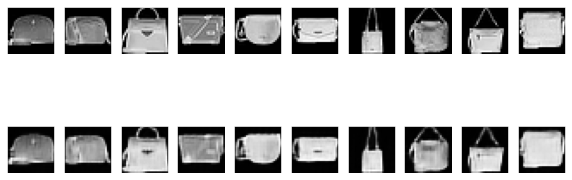

In [ ]:
# Сделаем предикт на данных на которых модель не училась
x_train_8 = xTrainMnistF[yTrainMnistF == 8]
x_train_8 = x_train_8/255  # представляем в виде значений от 0 до 1
predMnistF = modelAutoMnist.predict(x_train_8[:100]) # сделаем предикт для первых ста картинок из fashion_mnist

plotImages(10,x_train_8, predMnistF) # выведем на экран картинки правильных и восстановленных изображений 

##Лица

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q '/content/drive/MyDrive/Colab Notebooks/Базы/Лица.zip' # распоковываем базу с лицами с google диска в colaboratory

In [ ]:
images_dir = 'Лица' # зададим имя папки в которую распоковали изображения /content/
img_height = 112 # зададим высоту изображений
img_width = 80 # зададим ширину избражений

In [ ]:
# функция загрузки изображений, на вход принемает имя папки с изображениями, высоту и ширину к которой будут преобразованы загружаемые изображения
def load_images(images_dir, img_height, img_width): 
  list_images = [] # создаем пустой список в который будем загружать изображения
  for img in os.listdir(images_dir): # получим список изображений и для каждого изображения
  # добавим в список изображение в виде массива, с заданными размерами, в отенках серого
    list_images.append(image.img_to_array(image.load_img(os.path.join(images_dir, img), target_size=(img_height, img_width), color_mode='grayscale')))
  return np.array(list_images) # возвращаем numpy массив загруженных избражений

In [ ]:
cur_time = time.time() 
xTrain_imag = load_images(images_dir, img_height, img_width) # загрузим избражения лиц
print ('Время загрузки: ', round(time.time()-cur_time, 2), 'с', sep='')

Время загрузки: 36.55с


In [ ]:
xTrain_img = xTrain_imag/255 # отнормируем изображения от 0 до 1

In [ ]:
xTrain_img.shape # выведем размерность массива

(5018, 112, 80, 1)

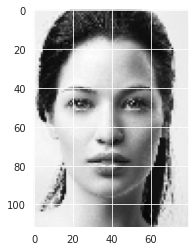

In [ ]:
plt.imshow(xTrain_img[np.random.randint(0, xTrain_img.shape[0])].reshape(112,80), cmap='gray') #выведем случайное изображение
plt.show()

In [ ]:
def baseAutoencoder(shape=(112,80,1)): # зададим функцию создания базового автокодировщика
    img_input = Input((shape)) # задаём входные размеры

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) # входные данные передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # затем пропускаем через слой нормализации данных 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # далее снова слой двумерной свёртки
    x = BatchNormalization()(x) # и еще слой нормализации данных
    x = MaxPooling2D()(x) # передаём на слой подвыборки, снижающий размерность поступивших на него данных

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # пропускаем через слой нормализации данных 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)  # далее снова слой двумерной свёртки
    x = BatchNormalization()(x) # и еще слой нормализации данных
    z = MaxPooling2D()(x) # передаём на слой подвыборки
    

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z) # слой разжимает данные(с 28*20 на 56*40)
    x = BatchNormalization()(x) # слой нормализации данных
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    # Сжатие MaxPooling2D не применяем

    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) # слой разжимает данные(с 56*40 на 112*80)
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных

    # Финальный слой двумерной свертки, выдающий итоговое изображение
    x = Conv2D(shape[-1], (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x) # указываем модель, с оригинальным изображением на входе в сеть и сжатым-разжатым на выходе из сети
    model.compile(optimizer=Adam(lr=0.0001),
                  loss='mean_squared_error') # компилируем модель с оптимайзером Адам и среднеквадратичной ошибкой

    return model # функция вернёт заданную модель

In [ ]:
def plotImages(xTrain, pred, shape=(112, 80)): # создадим функцию для вывода изображений как картинок
  n = 5  # количество картинок, которые хотим показать
  plt.figure(figsize=(14, 7)) # указываем размеры фигуры
  for i in range(n): # для каждой картинки из n(5)
      index = np.random.randint(0, pred.shape[0]) # startIndex - начиная с какого индекса хотим заплотить картинки
      # Показываем картинки из тестового набора
      ax = plt.subplot(2, n, i + 1) # выведем область рисования Axes
      plt.imshow(xTrain[index].reshape(shape)) # отрисуем правильные картинки в размере 112*80      
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y

      # Показываем восстановленные картинки
      ax = plt.subplot(2, n, i + 1 + n) # выведем область рисования Axes 
      plt.imshow(pred[index].reshape(shape)) # отрисуем обработанные сеткой картинки в размере 112*80     
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y
  plt.show()

In [ ]:
modelAutoFace = baseAutoencoder() # создаем автокодировщик

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# грузим данные в нашу модель, берём первые 4700 из xTrain_img и на вход, и на выход, в качестве проверочной берем оставшиеся из xTrain_img
modelAutoFace.fit(xTrain_img[:4700], xTrain_img[:4700], epochs=150, batch_size=100, validation_data = (xTrain_img[4700:], xTrain_img[4700:]))

Epoch 1/150
47/47 [==============================] - 15s 105ms/step - loss: 0.0443 - val_loss: 0.0637
Epoch 2/150
47/47 [==============================] - 5s 96ms/step - loss: 0.0135 - val_loss: 0.0624
Epoch 3/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0085 - val_loss: 0.0611
Epoch 4/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0064 - val_loss: 0.0586
Epoch 5/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0054 - val_loss: 0.0523
Epoch 6/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0049 - val_loss: 0.0440
Epoch 7/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0044 - val_loss: 0.0342
Epoch 8/150
47/47 [==============================] - 4s 96ms/step - loss: 0.0041 - val_loss: 0.0250
Epoch 9/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0039 - val_loss: 0.0183
Epoch 10/150
47/47 [==============================] - 4s 95ms/step - loss: 0.0037 - val_loss: 0.01

In [ ]:
modelAutoFace.save_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelAutoMnist_face.h5') # Сохраняем модель
modelAutoFace.load_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelAutoMnist_face.h5') # Загружаем модель

In [ ]:
predFace = modelAutoFace.predict(xTrain_img[:100]) # Получаем предсказание модели первых 100 лиц из обучающей выборки
predFace = predFace * 255 # представляем в виде значений от 0 до 255
predFace = predFace.astype('uint8') # устанавливаем 8битовый тип

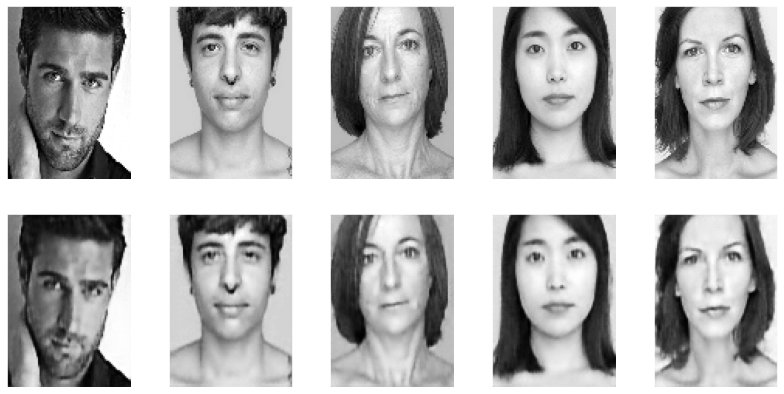

In [ ]:
plotImages(xTrain_img, predFace) #выведем оригинальные и сгенерированные автокодировщиком

In [ ]:
# Возьмем среднеквадратичные ошибки и выведем их для лиц 
errFace = [getMSE(xTrain_img[i], predFace[i] / 255) for i in range(len(predFace))] # посчитаем ошибку для всех изображений
print("Средняя ошибка на Лицах:", round(sum(errFace[80:]) / len(errFace[80:]), 4)) # посчитаем для последних 20 среднюю ошибку
print("Минимальная ошибка на Лицах:", round(min(errFace),4)) #найдем минимальную ошибку

Средняя ошибка на Лицах: 0.0014
Минимальная ошибка на Лицах: 0.0004


## 3.Генерация из шума


In [ ]:
noise = np.random.sample((100,112,80,1)) # создаем 100 картинок шума
print(noise.shape) # выведем размеры

(100, 112, 80, 1)


In [ ]:
predNoise = modelAutoFace.predict(noise[:100]) # сделаем предикт этих шумовых картинок
predNoise = predNoise * 255 # представляем в виде значений от 0 до 255
predNoise = predNoise.astype('uint8') # устанавливаем 8битовый тип

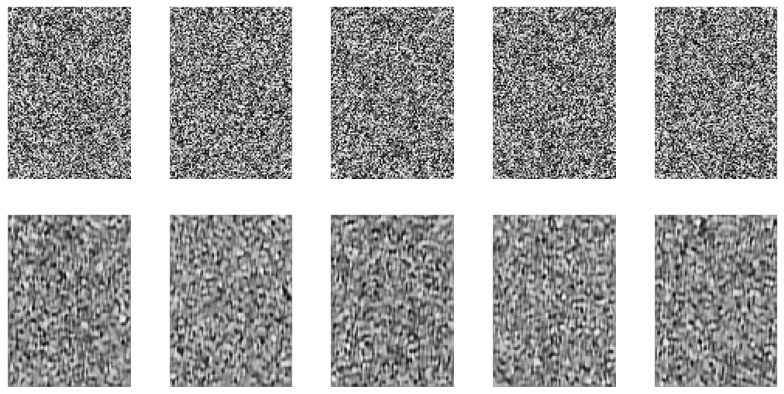

In [ ]:
plotImages(noise, predNoise) # выведем на экран исходные шумовые картинки и восстановленые 

In [ ]:
# Возьмем среднеквадратичные ошибки и выведем их для Mnist и для шумовых изображений
errN = [getMSE(noise[i], predNoise[i] / 255) for i in range(len(predNoise))]
print("Средняя ошибка на Лицах:", round(sum(errFace) / len(errFace), 4))
print("Средняя ошибка на шуме:", round(sum(errN) / len(errN), 4))
print("Максимальная ошибка на Лицах:", round(max(errFace),4))
print("Минимальная ошибка на шуме:", round(min(errN),4))

Средняя ошибка на Лицах: 0.0013
Средняя ошибка на шуме: 0.0646
Максимальная ошибка на Лицах: 0.0072
Минимальная ошибка на шуме: 0.0626


In [ ]:
bias = 0.0073 # установим какое-то пороговое значение
isFace = [e < bias for e in errFace] # запишем каждую ошибку больше порогового значения, Mnist
isNoise = [e < bias for e in errN] # запишем каждую ошибку больше порогового значения, fashion_mnist

print("Лиц распознано, как Лиц: ", round(100*sum(isFace) / len(isFace)),"%", sep="")
print("Шума распознано, как Лиц: ", round(100*sum(isNoise) / len(isNoise)),"%", sep="")
print("Суммарная ошибка: ", round(100*(1-(sum(isFace) / len(isFace)) + sum(isNoise) / len(isNoise))),"%", sep="")

Лиц распознано, как Лиц: 100%
Шума распознано, как Лиц: 0%
Суммарная ошибка: 0%


### Удаление шума


In [ ]:
def addNoise(x, noiseVal): # объявим функцию добавления шума
  #noise = np.random.sample((x.shape[0],28,28,1))
  noise = np.random.normal(loc=0.5, scale=0.5, size=x.shape) # создаем шум(с центром в 0.5 и отклонением 0.5)
  
  # Cкладываем с произведением шума*на усилитель шума и вводим ограничение значений от 0 до 1(clip)
  return np.clip(x + noiseVal * noise, 0., 1.) 

In [ ]:
noisedXTrainFace = addNoise(xTrain_img, 0.05) # cоздаем зашумленный вариант лиц из xTrain_img

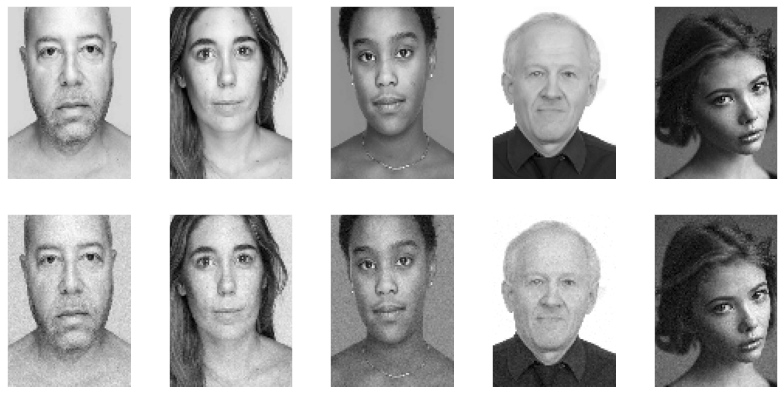

In [ ]:
plotImages(xTrain_img, noisedXTrainFace) # выведем на экран исходные лица и зашумленные варианты 

In [ ]:
def denoiseAutoencoder(): # объявляем функцию создания автокодировщика для подавления шума
    img_input = Input((112,80,1)) # задаём входные размеры

    # Добавляем четыре сверточных слоя, вместо MaxPooling используем strides
    x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(img_input)
    x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Flatten()(x) # сплющиваем в одномерный вектор - размер 7*5*256
    z = Dense(256, activation='relu')(x) # добавляем полносвязный слой
    x = Dense(7*5*256, activation='relu')(z) # и еще полносвязный слой с переводом в 8960-мерное пространство(7*5*256)
    x = Reshape((7,5,256))(x) # меняем размеры - картинка 7*5 , 256 ядер
    x = Conv2DTranspose(256, (3, 3), strides=2, padding='same')(x) # разжимаем картинки из 7*5 до 14*10
    x = Conv2DTranspose(128, (3, 3), strides=2, padding='same')(x) # разжимаем картинки из 14*10 до 28*20
    x = Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x) # разжимаем картинки из 28*20 до 56*40
    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x) # разжимаем картинки из 56*40 до 112*80   
    
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) # и пропускаем через финальный слой двумерной свертки

    model = Model(img_input, x) # собрали модель с зашумленной картинкой на вход и с очищенной от шума на выход
    model.compile(optimizer='adam',
                  loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки

    return model # функция вернет модель подавления шума

In [ ]:
modelDenoiseFace = denoiseAutoencoder()

In [ ]:
# Подаем на вход зашумленные картинки, а на выход правильные, исходные картинки, и обучаем
modelDenoiseFace.fit(noisedXTrainFace[:4700], xTrain_img[:4700], epochs=150, batch_size=128, validation_data = (noisedXTrainFace[4700:], xTrain_img[4700:]))

Epoch 1/150
37/37 [==============================] - 2s 63ms/step - loss: 0.0037 - val_loss: 0.0053
Epoch 2/150
37/37 [==============================] - 2s 63ms/step - loss: 0.0033 - val_loss: 0.0053
Epoch 3/150
37/37 [==============================] - 2s 63ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 4/150
37/37 [==============================] - 2s 64ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 5/150
37/37 [==============================] - 2s 63ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 6/150
37/37 [==============================] - 2s 63ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 7/150
37/37 [==============================] - 2s 63ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 8/150
37/37 [==============================] - 2s 63ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 9/150
37/37 [==============================] - 2s 63ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 10/150
37/37 [==============================] - 2s 65ms/step - loss: 0.0031 - val_loss: 0.0054

In [ ]:
modelDenoiseFace.save_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelDenoiseFace.h5') # Сохраняем модель
modelDenoiseFace.load_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelDenoiseFace.h5') # Сохраняем модель

In [ ]:
predFaceDenoise = modelDenoiseFace.predict(noisedXTrainFace[:4000]) # подаем 4тыс зашумленных картинок и делаем предикт
predFaceDenoise = predFaceDenoise * 255 # представляем в виде значений от 0 до 255
predFaceDenoise = predFaceDenoise.astype('uint8') # устанавливаем 8битовый тип

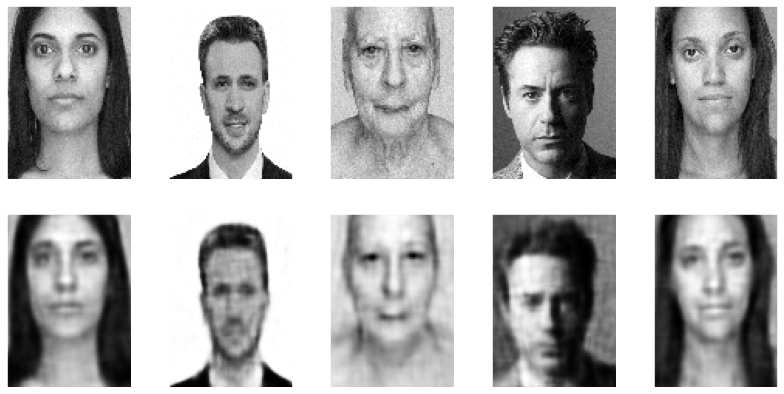

In [ ]:
plotImages(noisedXTrainFace, predFaceDenoise) # взглянем как отрабатывает шумоподавление на зашумленных картинках

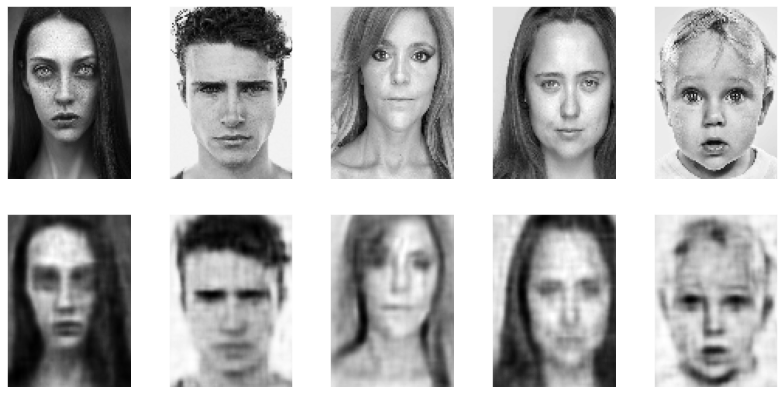

In [ ]:
plotImages(xTrain_img, predFaceDenoise) # взглянем как отрабатывает шумоподавление на лицах

### Иссл.1

In [ ]:
def denoiseAutoencoder_1(): # объявляем функцию создания автокодировщика для подавления шума
    img_input = Input((112,80,1)) # задаём входные размеры    
    x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(img_input)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(x)
    z = MaxPooling2D()(x)
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', activation='relu')(z)  
    x = BatchNormalization()(x)
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Flatten()
    x = Dense(256, activation='elu')(x)
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) # и пропускаем через финальный слой двумерной свертки

    model = Model(img_input, x) # собрали модель с зашумленной картинкой на вход и с очищенной от шума на выход
    model.compile(optimizer='adam',
                  loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки

    return model # функция вернет модель подавления шума

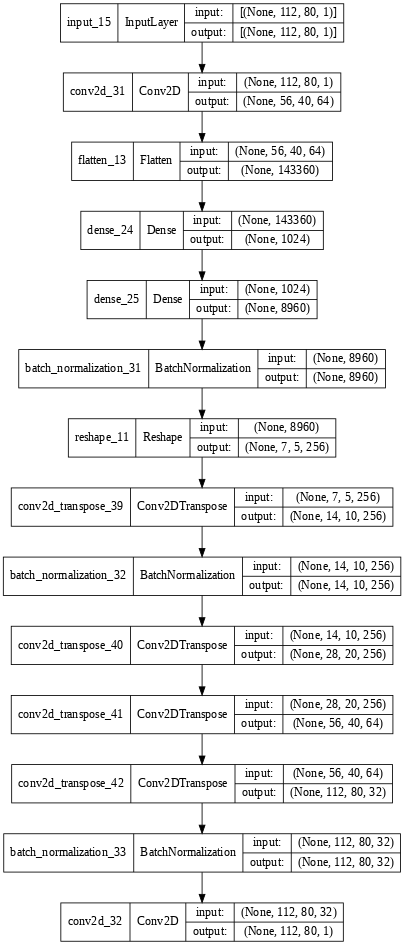

In [ ]:
utils.plot_model(modelDenoiseFace_1, dpi=60, show_shapes=True)

In [ ]:
modelDenoiseFace_1.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 112, 80, 1)]      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 56, 40, 64)        640       
                                                                 
 flatten_13 (Flatten)        (None, 143360)            0         
                                                                 
 dense_24 (Dense)            (None, 1024)              146801664 
                                                                 
 dense_25 (Dense)            (None, 8960)              9184000   
                                                                 
 batch_normalization_31 (Bat  (None, 8960)             35840     
 chNormalization)                                                
                                                          

In [ ]:
# Подаем на вход зашумленные картинки, а на выход правильные, исходные картинки, и обучаем
modelDenoiseFace_1.fit(noisedXTrainFace[:4700], xTrain_img[:4700], epochs=150, batch_size=128, validation_data = (noisedXTrainFace[4700:], xTrain_img[4700:]))

Epoch 1/150
37/37 [==============================] - 5s 108ms/step - loss: 0.0363 - val_loss: 0.2105
Epoch 2/150
37/37 [==============================] - 4s 97ms/step - loss: 0.0172 - val_loss: 0.1011
Epoch 3/150
37/37 [==============================] - 4s 97ms/step - loss: 0.0130 - val_loss: 0.0946
Epoch 4/150
37/37 [==============================] - 4s 97ms/step - loss: 0.0110 - val_loss: 0.0522
Epoch 5/150
37/37 [==============================] - 4s 97ms/step - loss: 0.0098 - val_loss: 0.0551
Epoch 6/150
37/37 [==============================] - 4s 97ms/step - loss: 0.0089 - val_loss: 0.0589
Epoch 7/150
37/37 [==============================] - 4s 98ms/step - loss: 0.0083 - val_loss: 0.0509
Epoch 8/150
37/37 [==============================] - 4s 100ms/step - loss: 0.0077 - val_loss: 0.0597
Epoch 9/150
37/37 [==============================] - 4s 98ms/step - loss: 0.0075 - val_loss: 0.0923
Epoch 10/150
37/37 [==============================] - 4s 98ms/step - loss: 0.0072 - val_loss: 0.08

In [ ]:
modelDenoiseFace_1.save_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelDenoiseFace1.h5') # Сохраняем модель
modelDenoiseFace_1.load_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelDenoiseFace1.h5') # Сохраняем модель

In [ ]:
predFaceDenoise_1 = modelDenoiseFace_1.predict(noisedXTrainFace[:4000]) # подаем 4тыс зашумленных картинок и делаем предикт
predFaceDenoise_1 = predFaceDenoise_1 * 255 # представляем в виде значений от 0 до 255
predFaceDenoise_1 = predFaceDenoise_1.astype('uint8') # устанавливаем 8битовый тип

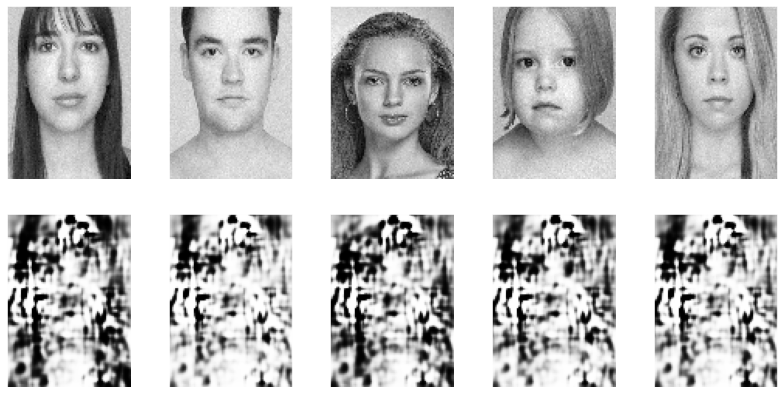

In [ ]:
plotImages(noisedXTrainFace, predFaceDenoise_1) # взглянем как отрабатывает шумоподавление на зашумленных картинках

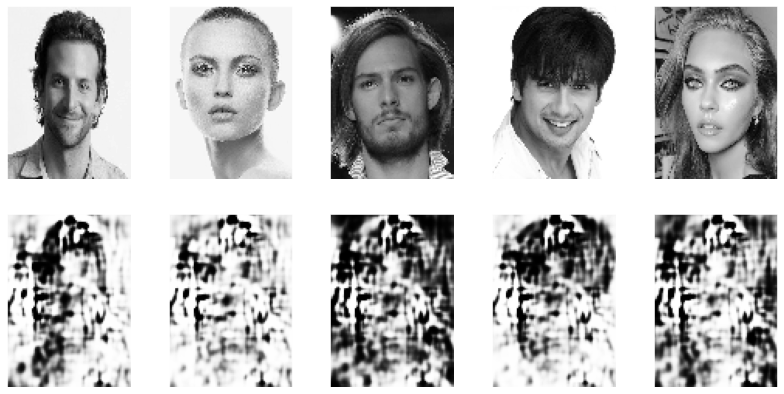

In [ ]:
plotImages(xTrain_img, predFaceDenoise_1) # взглянем как отрабатывает шумоподавление на лицах

### Иссл.2

In [ ]:
def denoiseAutoencoder_2(): # объявляем функцию создания автокодировщика для подавления шума
    img_input = Input((112,80,1)) # задаём входные размеры

    x=Conv2D(128,(7,7),activation='relu',padding='same')(img_input)
    x=MaxPooling2D((2,2),padding='same')(x)
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    z = Conv2D(1, (7, 7), activation='relu', padding='same')(x)
    x = Conv2D(32, (7, 7), activation='relu', padding='same')(z)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x)
  

    model = Model(img_input, x) # собрали модель с зашумленной картинкой на вход и с очищенной от шума на выход
    model.compile(optimizer='adam',
                  loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки

    return model # функция вернет модель подавления шума

In [ ]:
modelDenoiseFace_2 = denoiseAutoencoder_2()

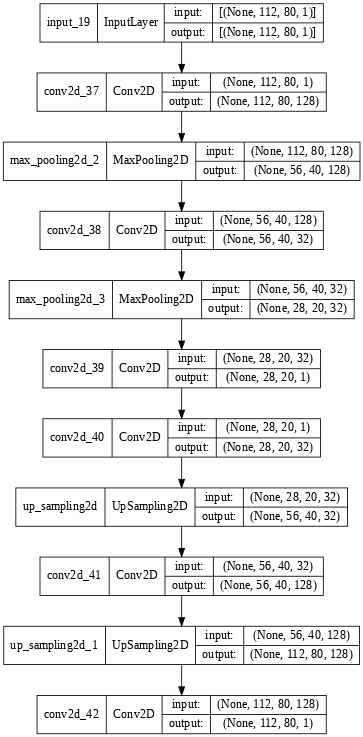

In [ ]:
utils.plot_model(modelDenoiseFace_2, dpi=60, show_shapes=True)

In [ ]:
modelDenoiseFace_2.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 112, 80, 1)]      0         
                                                                 
 conv2d_37 (Conv2D)          (None, 112, 80, 128)      6400      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 56, 40, 128)      0         
 2D)                                                             
                                                                 
 conv2d_38 (Conv2D)          (None, 56, 40, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_39 (Conv2D)          (None, 28, 20, 1)         156

In [ ]:
# Подаем на вход зашумленные картинки, а на выход правильные, исходные картинки, и обучаем
modelDenoiseFace_2.fit(noisedXTrainFace[:4700], xTrain_img[:4700], epochs=150, batch_size=128, validation_data = (noisedXTrainFace[4700:], xTrain_img[4700:]))

Epoch 1/150
37/37 [==============================] - 8s 153ms/step - loss: 0.0421 - val_loss: 0.0132
Epoch 2/150
37/37 [==============================] - 4s 102ms/step - loss: 0.0112 - val_loss: 0.0099
Epoch 3/150
37/37 [==============================] - 4s 102ms/step - loss: 0.0082 - val_loss: 0.0071
Epoch 4/150
37/37 [==============================] - 4s 102ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 5/150
37/37 [==============================] - 4s 103ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 6/150
37/37 [==============================] - 4s 104ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 7/150
37/37 [==============================] - 4s 103ms/step - loss: 0.0061 - val_loss: 0.0062
Epoch 8/150
37/37 [==============================] - 4s 104ms/step - loss: 0.0055 - val_loss: 0.0057
Epoch 9/150
37/37 [==============================] - 4s 103ms/step - loss: 0.0060 - val_loss: 0.0050
Epoch 10/150
37/37 [==============================] - 4s 103ms/step - loss: 0.0051 - val_lo

In [ ]:
modelDenoiseFace_2.save_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelDenoiseFace2.h5') # Сохраняем модель
modelDenoiseFace_2.load_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelDenoiseFace2.h5') # Загружаем модель

In [ ]:
predFaceDenoise_2 = modelDenoiseFace_2.predict(noisedXTrainFace[:4000]) # подаем 4тыс зашумленных картинок и делаем предикт
predFaceDenoise_2 = predFaceDenoise_2 * 255 # представляем в виде значений от 0 до 255
predFaceDenoise_2 = predFaceDenoise_2.astype('uint8') # устанавливаем 8битовый тип

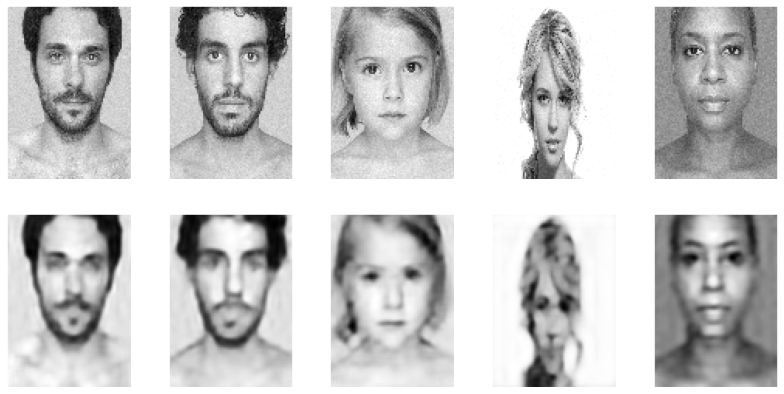

In [ ]:
plotImages(noisedXTrainFace, predFaceDenoise_2) # взглянем как отрабатывает шумоподавление на зашумленных картинках

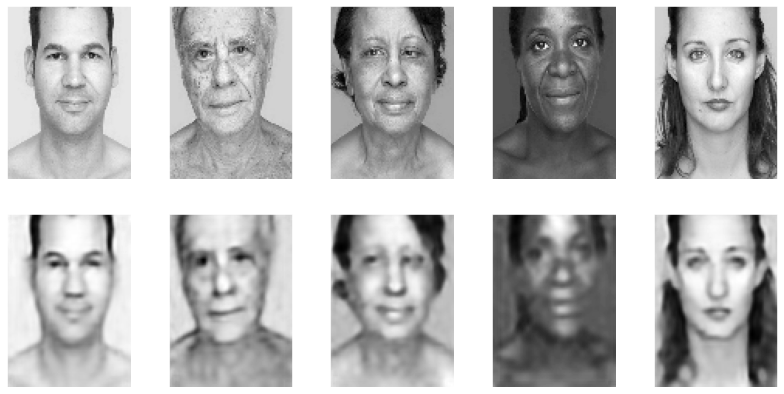

In [ ]:
plotImages(xTrain_img, predFaceDenoise_2) # взглянем как отрабатывает шумоподавление на лицах

### Иссл.3

In [ ]:
def denoiseAutoencoder_3(): # объявляем функцию создания автокодировщика для подавления шума
    img_input = Input((112,80,1)) # задаём входные размеры

    x = Conv2D(128,(7,7),activation='relu',padding='same')(img_input)
    x = MaxPooling2D((2,2),padding='same')(x)
    # x = Flatten()(x)

    # x = Dense(64, activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = Dense(64, activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = Flatten()(x)

    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    z = Conv2D(1, (7, 7), activation='relu', padding='same')(x)
    
    x = Flatten()(z)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(32, (7, 7), activation='relu', padding='same')(z)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x)
  

    model = Model(img_input, x) # собрали модель с зашумленной картинкой на вход и с очищенной от шума на выход
    model.compile(optimizer='adam',
                  loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки

    return model # функция вернет модель подавления шума

In [ ]:
modelDenoiseFace_3 = denoiseAutoencoder_3()

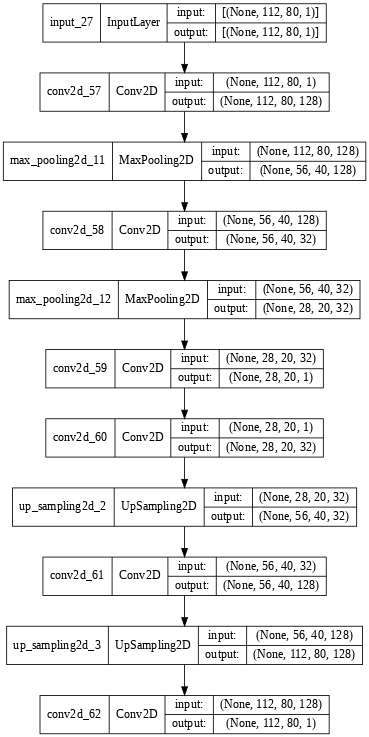

In [ ]:
utils.plot_model(modelDenoiseFace_3, dpi=60, show_shapes=True)

In [ ]:
modelDenoiseFace_3.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 112, 80, 1)]      0         
                                                                 
 conv2d_63 (Conv2D)          (None, 112, 80, 128)      6400      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 40, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 56, 40, 32)        16416     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 28, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 28, 20, 1)         156

In [ ]:
# Подаем на вход зашумленные картинки, а на выход правильные, исходные картинки, и обучаем
modelDenoiseFace_3.fit(noisedXTrainFace[:4700], xTrain_img[:4700], epochs=150, batch_size=128, validation_data = (noisedXTrainFace[4700:], xTrain_img[4700:]))

Epoch 1/150
37/37 [==============================] - 5s 107ms/step - loss: 0.0361 - val_loss: 0.0133
Epoch 2/150
37/37 [==============================] - 4s 102ms/step - loss: 0.0105 - val_loss: 0.0084
Epoch 3/150
37/37 [==============================] - 4s 103ms/step - loss: 0.0085 - val_loss: 0.0075
Epoch 4/150
37/37 [==============================] - 4s 102ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 5/150
37/37 [==============================] - 4s 102ms/step - loss: 0.0066 - val_loss: 0.0058
Epoch 6/150
37/37 [==============================] - 4s 103ms/step - loss: 0.0061 - val_loss: 0.0060
Epoch 7/150
37/37 [==============================] - 4s 103ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 8/150
37/37 [==============================] - 4s 102ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 9/150
37/37 [==============================] - 4s 102ms/step - loss: 0.0052 - val_loss: 0.0055
Epoch 10/150
37/37 [==============================] - 4s 102ms/step - loss: 0.0051 - val_lo

In [ ]:
modelDenoiseFace_3.save_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelDenoiseFace3.h5') # Сохраняем модель
modelDenoiseFace_3.load_weights('/content/drive/MyDrive/Colab Notebooks/Базы/modelDenoiseFace3.h5') # Загружаем модель

In [ ]:
predFaceDenoise_3 = modelDenoiseFace_3.predict(noisedXTrainFace[:4000]) # подаем 4тыс зашумленных картинок и делаем предикт
predFaceDenoise_3 = predFaceDenoise_3 * 255 # представляем в виде значений от 0 до 255
predFaceDenoise_3 = predFaceDenoise_3.astype('uint8') # устанавливаем 8битовый тип

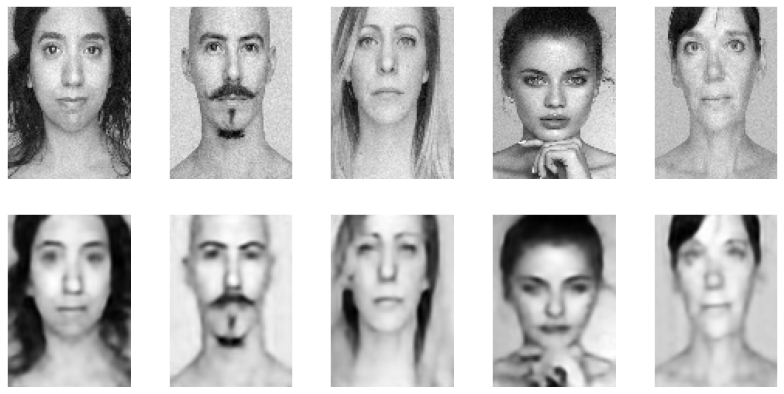

In [ ]:
plotImages(noisedXTrainFace, predFaceDenoise_3) # взглянем как отрабатывает шумоподавление на зашумленных картинках

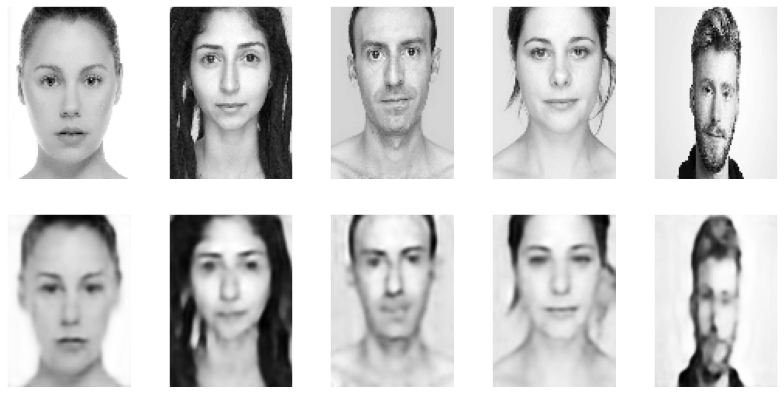

In [ ]:
plotImages(xTrain_img, predFaceDenoise_3) # взглянем как отрабатывает шумоподавление на лицах

In [ ]:
# Возьмем среднеквадратичные ошибки 
err_origin = [getMSE(noisedXTrainFace[i], predFaceDenoise[i] / 255) for i in range(len(predFaceDenoise))]
err_research_1 = [getMSE(noisedXTrainFace[i], predFaceDenoise_1[i] / 255) for i in range(len(predFaceDenoise_1))]
err_research_2 = [getMSE(noisedXTrainFace[i], predFaceDenoise_2[i] / 255) for i in range(len(predFaceDenoise_2))]
err_research_3 = [getMSE(noisedXTrainFace[i], predFaceDenoise_3[i] / 255) for i in range(len(predFaceDenoise_3))]

print("Средняя ошибка на исходном автокодировщике :", round(sum(err_origin) / len(err_origin), 4))
print("Средняя ошибка на автокодировщике иссл.1 :", round(sum(err_research_1) / len(err_research_1), 4))
print("Средняя ошибка на автокодировщике иссл.2 :", round(sum(err_research_2) / len(err_research_2), 4))
print("Средняя ошибка на автокодировщике иссл.3 :", round(sum(err_research_3) / len(err_research_3), 4))

Средняя ошибка на исходном автокодировщике : 0.0039
Средняя ошибка на автокодировщике иссл.1 : 0.0983
Средняя ошибка на автокодировщике иссл.2 : 0.0042
Средняя ошибка на автокодировщике иссл.3 : 0.0039


Минимальная ошибка оказалась на архитектуре из урока и в иссл.3 собственная архитектура дала хороший результат после добавления слоев Dense в decoder.